In [1]:
import numpy as np

def an_sol(x,a,rel_perm,tK,cinf,zval,zeta,gradflag=0):
    echarge=1.602e-19 #elementary charge [C]
    perm0=8.85e-12 #vacuum permittivity [F/m]
    kB=1.381e-23 #Boltzmann's constant [J/K]
    kA=6.022e23 #Avogadro constant [1/mol]

    debye_len=np.sqrt(perm0*rel_perm*kB*tK/2/(zval*echarge)**2/kA/cinf)
    print('DEBYE LENGTH IS:',debye_len*1e9,'nm')
    
    if gradflag:
        zeta=zeta/(1/debye_len+1/a)/perm0/rel_perm
    
    u=zeta*a*np.exp((a-x)/debye_len)/x
    du=-u*(1/debye_len+1/x) #du/dr
    return u,du

mesh_prefix='sphere'

#load mesh
print('Reading %s.1.node'%mesh_prefix)
nodes=np.genfromtxt(mesh_prefix+'.1.node',skip_header=1,skip_footer=1,usecols=(1,2,3))
node_flags=np.genfromtxt(mesh_prefix+'.1.node',skip_header=1,skip_footer=1,usecols=5,dtype='int')

print('Reading %s.1.ele'%mesh_prefix)
elements=np.genfromtxt(mesh_prefix+'.1.ele',skip_header=1,usecols=(1,2,3,4),dtype='int')
zones=np.genfromtxt(mesh_prefix+'.1.ele',skip_header=1,usecols=5,dtype='int')

print('Reading %s.1.face'%mesh_prefix)
faces=np.genfromtxt(mesh_prefix+'.1.face',skip_header=1,usecols=(1,2,3),dtype='int')
face_flags=np.genfromtxt(mesh_prefix+'.1.face',skip_header=1,usecols=4,dtype='int')

#adjust indices to start from zero
elements=elements-1
faces=faces-1

# #translate z coordinate
# print('Translating Z coordinate')
# nodes[:,2]=-(np.power(10,-nodes[:,2]/1000*3)-1) #problem dependent
dist1=np.sqrt(nodes[:,0]**2+nodes[:,1]**2+nodes[:,2]**2)
mask=dist1>5.0
dist2=np.zeros_like(dist1)
dist2[mask]=10**((dist1[mask]-5)/50*2)+5-1

print(min(dist1[mask]),max(dist1[mask]))
print(min(dist2[mask]),max(dist2[mask]))
nodes[mask,0]=nodes[mask,0]/dist1[mask]*dist2[mask]
nodes[mask,1]=nodes[mask,1]/dist1[mask]*dist2[mask]
nodes[mask,2]=nodes[mask,2]/dist1[mask]*dist2[mask]

#scale nodes from meter to nano-meter
nodes=nodes*1e-9

nnode=len(nodes)
nelem=len(elements)
nface=len(faces)
print('THE NUMBER OF NODES IS: %d'%nnode)
print('THE NUMBER OF ELEMENTS IS: %d'%nelem)
print('THE NUMBER OF FACES IS: %d'%nface)

#compute middle point of each elements (efficiency to be improved)
nelem=len(elements[:,0])
midpoints=np.zeros((nelem,3))
for i in range(0,nelem):
    for j in range(0,3):
        midpoints[i,j]=.25*sum(nodes[elements[i,:],j])

#compute analytical solution
dist=np.sqrt(midpoints[:,0]**2+midpoints[:,1]**2+midpoints[:,2]**2)
ua,dua=an_sol(dist,a=5e-9,rel_perm=78.5,tK=298,cinf=100,zval=1,zeta=0.01,gradflag=1)
print('')

ue=np.copy(ua)
due=np.zeros((len(dua),3))
due[:,0]=dua*midpoints[:,0]/dist
due[:,1]=dua*midpoints[:,1]/dist
due[:,2]=dua*midpoints[:,2]/dist

Reading sphere.1.node
Reading sphere.1.ele
Reading sphere.1.face
5.000058817654048 87.4685657822283
5.000005417320811 1993.4939888608171
THE NUMBER OF NODES IS: 24157
THE NUMBER OF ELEMENTS IS: 135851
THE NUMBER OF FACES IS: 17578
DEBYE LENGTH IS: 0.9617530004493543 nm



In [2]:
#update PDE coefficients below
mesh_prefix='sphere'
outfile='sphere_s51_1.npz'

#set physical constants and properties
echarge=1.602e-19 #elementary charge [C]
perm0=8.85e-12 #vacuum permittivity [F/m]
kB=1.381e-23 #Boltzmann's constant [J/K]
kA=6.022e23 #Avogadro constant [1/mol]

rel_perm=80 #relative permittivity of bulk electrolyte [F/m]
tK=293 #room/ambient temperature [K]
cinf=1 #ion concentration in bulk electrolyte [mol/m^3]
zval=1 #ion valence in bulk electrolyte
# cinf_pos=0.01 #ion concentration of positive charges
# cinf_neg=0.01 #concentration of negative charges
# zval_pos=1 #positive ion valence
# zval_neg=1 #negative ion valence

rel_perm=78.5
tK=298
cinf=100
zval=1

#load mesh
print('Reading %s.1.node'%mesh_prefix)
nodes=np.genfromtxt(mesh_prefix+'.1.node',skip_header=1,skip_footer=1,usecols=(1,2,3))
node_flags=np.genfromtxt(mesh_prefix+'.1.node',skip_header=1,skip_footer=1,usecols=5,dtype='int')

print('Reading %s.1.ele'%mesh_prefix)
elements=np.genfromtxt(mesh_prefix+'.1.ele',skip_header=1,usecols=(1,2,3,4),dtype='int')
zones=np.genfromtxt(mesh_prefix+'.1.ele',skip_header=1,usecols=5,dtype='int')

print('Reading %s.1.face'%mesh_prefix)
faces=np.genfromtxt(mesh_prefix+'.1.face',skip_header=1,usecols=(1,2,3),dtype='int')
face_flags=np.genfromtxt(mesh_prefix+'.1.face',skip_header=1,usecols=4,dtype='int')

#adjust indices to start from zero
elements=elements-1
faces=faces-1

# #translate z coordinate
# print('Translating Z coordinate')
# nodes[:,2]=-(np.power(10,-nodes[:,2]/1000*3)-1) #problem dependent
dist1=np.sqrt(nodes[:,0]**2+nodes[:,1]**2+nodes[:,2]**2)
mask=dist1>5.0
dist2=np.zeros_like(dist1)
dist2[mask]=10**((dist1[mask]-5)/50*2)+5-1

print(min(dist1[mask]),max(dist1[mask]))
print(min(dist2[mask]),max(dist2[mask]))
nodes[mask,0]=nodes[mask,0]/dist1[mask]*dist2[mask]
nodes[mask,1]=nodes[mask,1]/dist1[mask]*dist2[mask]
nodes[mask,2]=nodes[mask,2]/dist1[mask]*dist2[mask]

#scale nodes from meter to nano-meter
nodes=nodes*1e-9

nnode=len(nodes)
nelem=len(elements)
nface=len(faces)
print('THE NUMBER OF NODES IS: %d'%nnode)
print('THE NUMBER OF ELEMENTS IS: %d'%nelem)
print('THE NUMBER OF FACES IS: %d'%nface)

#set boolean indicies for volume elements, S1 nodes, and S2 elements
mask_e=zones<=4 #all elements
# mask_d=node_flags==1 #boolean node indices True for Dirichlet nodes
# mask_s=face_flags==1 #boolean face indices True for third kind surface elements
mask_d=(node_flags==1)|(node_flags==2) #outer boundary may need to be updated
#mask_s=np.zeros_like(face_flags) #empty for this case
mask_s=face_flags==20 #interface between zone 1 and 2

#node indices on surface elements
nind_s=np.unique(faces[face_flags==20].flatten(order='C'))
nind_s=np.unique(faces[face_flags==20].flatten(order='C'))

#initialize vector PDE coefficients
diffusion=2*1e-6**2/1e-3 #Diffusion coefficient of water at 20 deg. C is 2*(1e-6*m)^2/(1e-3*s)
mobility=5e-8 #mobility of sodium cation [m^2/(Vs)]

#initialize scalar PDE coefficients
print('Setting PDE coefficients')
cx=np.zeros(nface)
cy=np.zeros(nface)
cz=np.zeros(nface)

cx[face_flags==20]=diffusion/10
cy[face_flags==20]=diffusion/10
cz[face_flags==20]=diffusion/10

alphax=np.zeros(nface) #unused so far
alphay=np.zeros(nface) #unused so far
alphaz=np.zeros(nface) #unused so far

betax=np.zeros(nface) #unused so far
betay=np.zeros(nface) #unused so far
betaz=np.zeros(nface) #unused so far

gammax=np.zeros(nface,dtype=complex)
gammay=np.zeros(nface,dtype=complex)
gammaz=np.zeros(nface,dtype=complex)

a=np.zeros(nface,dtype=complex)
f=np.zeros(nface,dtype=complex)
# a='pb' #will be setup in main.py with shape (nnode,)
# f='pb' #will be setup in main.py with shape (nnode,)
a[mask_s]=1j*0.1

g=np.zeros(nface) #length of ns for essential entries
q=np.zeros(nface) #length of ns for essential entries
s=np.zeros(nnode) #length of nd for essential entries

#set Dirichlet B.C on solid interface
#for monovalent ions (zval=1), we can use linear PB equation for phi_e<<26mV
#for divalent ions (zval=2), we can use linear PB equation for phi_e<<13 mv
#s[node_flags==10]=0.1 #phi_e=0.1V
#g[nind_s]=0.01 #surface charge density [C/m^2]

#initialize vector PDE coefficients
print('Initialize PDE coefficients in electrolyte')
cx33=np.zeros((len(elements),3,3)) #PDE term coefficient
cy33=np.zeros((len(elements),3,3)) #PDE term coefficient
cz33=np.zeros((len(elements),3,3)) #PDE term coefficient

alphax33=np.zeros((len(elements),3,3)) #PDE term coefficient
alphay33=np.zeros((len(elements),3,3)) #PDE term coefficient
alphaz33=np.zeros((len(elements),3,3)) #PDE term coefficient

betax33=np.zeros((len(elements),3,3)) #PDE term coefficient
betay33=np.zeros((len(elements),3,3)) #PDE term coefficient
betaz33=np.zeros((len(elements),3,3)) #PDE term coefficient

gammax33=np.zeros((len(elements),3,3)) #PDE term coefficient
gammay33=np.zeros((len(elements),3,3)) #PDE term coefficient
gammaz33=np.zeros((len(elements),3,3)) #PDE term coefficient

a33=np.zeros((len(elements),3,3),dtype=complex) #PDE term coefficient
f3=np.zeros((len(elements),3)) #source term coefficient
g3=np.zeros((len(nodes),3),dtype=complex) #Neumann boundary condition coefficient
q33=np.zeros((len(nodes),3,3)) #Neumann boundary condition coefficient
s3=np.zeros((len(nodes),3)) #Dirichlet boundary condition coefficient

cx33[zones>=3,0,0]=diffusion
cx33[zones>=3,1,1]=diffusion
cx33[zones>=3,2,2]=perm0*rel_perm
cx33[zones>=3,0,2]=-mobility*cinf*np.exp(echarge/kB/tK*ue[zones>=3])
cx33[zones>=3,1,2]=mobility*cinf*np.exp(-echarge/kB/tK*ue[zones>=3])
print('cx33[zones>=3,0,2]')
print(cx33[zones>=3,0,2])
print('cx33[zones>=3,1,2]')
print(cx33[zones>=3,1,2])

alphax33[zones>=3,0,0]=-mobility*due[zones>=3,0]
alphax33[zones>=3,1,1]=mobility*due[zones>=3,0]

alphay33[zones>=3,0,0]=-mobility*due[zones>=3,1]
alphay33[zones>=3,1,1]=mobility*due[zones>=3,1]

alphaz33[zones>=3,0,0]=-mobility*due[zones>=3,2]
alphaz33[zones>=3,1,1]=mobility*due[zones>=3,2]

a33[zones>=3,0,0]=1j*0.1 #angular frequency as 0.1
a33[zones>=3,1,1]=1j*0.1 #angular frequency as 0.1
a33[zones>=3,2,0]=echarge
a33[zones>=3,2,1]=-echarge

g3[nind_s,2]=0.005 #initial surface charge density [C/m^2]
#s3[mask_d,2]=0.1 #external potential field
s3[mask_d,2]=0.1/100e-9*nodes[mask_d,0]
print(nodes[mask_d,0])

print('Initialize PDE coefficients in solid')
cx33[zones<=2,2,2]=perm0*4.5
cy33=np.copy(cx33)
cz33=np.copy(cx33)

a33[zones<=2,0,0]=1j*0.1 #angular frequency as 0.1
a33[zones<=2,1,1]=1j*0.1 #angular frequency as 0.1

#save PDE coefficients to a file
print('Saving PDE coefficients to %s'%outfile)
np.savez(outfile,nodes=nodes,elements=elements,faces=faces,
         node_flags=node_flags,zones=zones,face_flags=face_flags,
         mask_e=mask_e,mask_d=mask_d,mask_s=mask_s,
         cx=cx,cy=cy,cz=cz,
         alphax=alphax,alphay=alphay,alphaz=alphaz,
         betax=betax,betay=betay,betaz=betaz,
         gammax=gammax,gammay=gammay,gammaz=gammaz,
         a=a,f=f,g=g,q=q,s=s,
         cx33=cx33,cy33=cy33,cz33=cz33,
         alphax33=alphax33,alphay33=alphay33,alphaz33=alphaz33,
         betax33=betax33,betay33=betay33,betaz33=betaz33,
         gammax33=gammax33,gammay33=gammay33,gammaz33=gammaz33,
         a33=a33,f3=f3,g3=g3,q33=q33,s3=s3,
         rel_perm=rel_perm,tK=tK,cinf=cinf,zval=zval)

print('Done')


Reading sphere.1.node
Reading sphere.1.ele
Reading sphere.1.face
5.000058817654048 87.4685657822283
5.000005417320811 1993.4939888608171
THE NUMBER OF NODES IS: 24157
THE NUMBER OF ELEMENTS IS: 135851
THE NUMBER OF FACES IS: 17578
Setting PDE coefficients
Initialize PDE coefficients in electrolyte
cx33[zones>=3,0,2]
[-5.92456151e-06 -5.61346059e-06 -5.70377787e-06 ... -5.61070299e-06
 -5.61345685e-06 -5.66718569e-06]
cx33[zones>=3,1,2]
[4.21972157e-06 4.45358074e-06 4.38305989e-06 ... 4.45576963e-06
 4.45358371e-06 4.41136066e-06]
[ 1.15094429e-06  1.15094429e-06 -1.15094429e-06 ... -1.53057620e-08
 -9.49985807e-08  3.45739602e-08]
Initialize PDE coefficients in solid
Saving PDE coefficients to sphere_s51_1.npz
Done


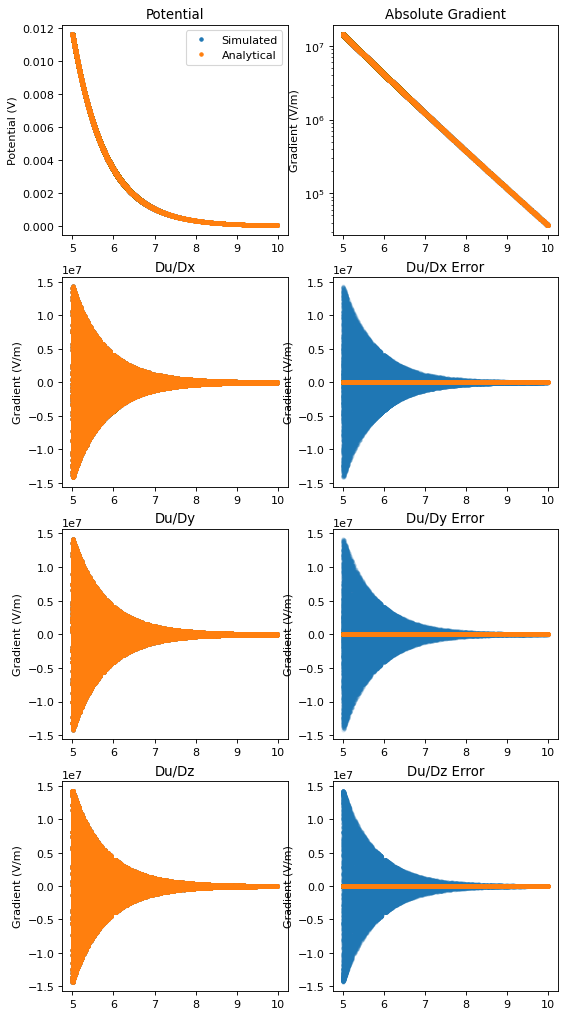

In [3]:
import matplotlib.pyplot as plt

dist=np.sqrt(midpoints[:,0]**2+midpoints[:,1]**2+midpoints[:,2]**2)
mask=(dist>5e-9)&(dist<10e-9)

fig,ax=plt.subplots(4,2,sharex=False,figsize=(8,16),dpi=80)
axs=ax.flatten()
axs[0].plot(dist[mask]*1e9,ue[mask],'.')
axs[0].plot(dist[mask]*1e9,ua[mask],'.')
# axs[0].set_xlabel('Distance (nm)')
axs[0].set_ylabel('Potential (V)')
axs[0].set_title('Potential')
axs[0].legend(['Simulated','Analytical'])

axs[1].plot(dist[mask]*1e9,np.sqrt(due[mask,0]**2+due[mask,1]**2+due[mask,2]**2),'.')
axs[1].plot(dist[mask]*1e9,np.abs(dua[mask]),'.')
axs[1].set_yscale('log')
# axs[1].set_xlabel('Distance (nm)')
axs[1].set_ylabel('Gradient (V/m)')
axs[1].set_title('Absolute Gradient')

axs[2].plot(dist[mask]*1e9,due[mask,0],'.')
axs[2].plot(dist[mask]*1e9,dua[mask]*midpoints[mask,0]/dist[mask],'.')
axs[2].set_ylabel('Gradient (V/m)')
axs[2].set_title('Du/Dx')

axs[3].plot(dist[mask]*1e9,(due[mask,0]),'.',alpha=0.1)
axs[3].plot(dist[mask]*1e9,(due[mask,0]-dua[mask]*midpoints[mask,0]/dist[mask]),'.')
axs[3].set_ylabel('Gradient (V/m)')
axs[3].set_title('Du/Dx Error')

axs[4].plot(dist[mask]*1e9,due[mask,1],'.')
axs[4].plot(dist[mask]*1e9,dua[mask]*midpoints[mask,1]/dist[mask],'.')
axs[4].set_ylabel('Gradient (V/m)')
axs[4].set_title('Du/Dy')

axs[5].plot(dist[mask]*1e9,(due[mask,1]),'.',alpha=0.1)
axs[5].plot(dist[mask]*1e9,(due[mask,1]-dua[mask]*midpoints[mask,1]/dist[mask]),'.')
axs[5].set_ylabel('Gradient (V/m)')
axs[5].set_title('Du/Dy Error')

axs[6].plot(dist[mask]*1e9,due[mask,2],'.')
axs[6].plot(dist[mask]*1e9,dua[mask]*midpoints[mask,2]/dist[mask],'.')
axs[6].set_ylabel('Gradient (V/m)')
axs[6].set_title('Du/Dz')

axs[7].plot(dist[mask]*1e9,(due[mask,2]),'.',alpha=0.1)
axs[7].plot(dist[mask]*1e9,(due[mask,2]-dua[mask]*midpoints[mask,2]/dist[mask]),'.')
axs[7].set_ylabel('Gradient (V/m)')
axs[7].set_title('Du/Dz Error')

plt.show()
